<a href="https://colab.research.google.com/github/Risad-Raihan/10ms/blob/master/nirjhor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)


Mounted at /content/drive


In [2]:
!pip install pandas statsmodels


In [3]:
import pandas as pd

In [4]:
import pandas as pd

# Load the dataset from your Google Drive
file_path = '/content/drive/My Drive/ops_segmentation-main/nirjhor.dta'  # Update with the correct path
data = pd.read_stata(file_path)

# Display the first few rows to verify that it loaded correctly
data.head()


,district,upazila,school_list,hhid,village,member_count,respondent_age,marriage_age,respondent_sex,hh_head_identify,...,seqe22,seqe23,seqe24,seqe25,seqe26,seqe27,seqe28,father_edu,mother_edu,hh_occu
0,Cox's Bazar,Ramu,Uttar Mithachori Loyar SeconderyHigh School.,47,Uttar Mitachari Para,7,50,12,Female,Yes,...,Always,Always,Always,Always,Always,Always,Always,Above Primary Education,Above Primary Education,Formal Work
1,Cox's Bazar,Ramu,Uttar Mithachori Loyar SeconderyHigh School.,77,Gain Para,7,30,14,Female,No,...,Always,Always,Always,Always,Always,Always,Always,Primary Education,Primary Education,Informal Work
2,Cox's Bazar,Ramu,Uttar Mithachori Loyar SeconderyHigh School.,78,Gain para,6,39,17,Female,No,...,Always,Always,Always,Always,Sometimes,Always,Always,Primary Education,Primary Education,Informal Work
3,Cox's Bazar,Ramu,Uttar Mithachori Loyar SeconderyHigh School.,48,CHAWDHURY PARA,5,32,17,Female,No,...,Always,Always,Always,Always,Always,Often,Always,Primary Education,Primary Education,Informal Work
4,Cox's Bazar,Ramu,Alhaj Fazal Ambia High School,13,Sikalgaht nashikul,5,40,20,Male,Yes,...,Always,Always,Always,Always,Always,Sometimes,Always,Primary Education,Above Primary Education,Formal Work


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Columns: 112 entries, district to hh_occu
dtypes: category(93), float32(1), int32(2), int8(8), object(8)
memory usage: 25.1+ KB


In [6]:
# CYRM-28 columns to sum for personal resilience
seqe_columns = ['seqe1', 'seqe2', 'seqe3', 'seqe7', 'seqe9', 'seqe10', 'seqe12', 'seqe13', 'seqe14']

# Defining the response mapping for CYRM-28 scoring
response_mapping = {
    'Never': 1,
    'Very Little': 2,
    'Sometimes': 3,
    'Often': 4,
    'Always': 5
}

# Apply the mapping to convert responses to numeric values for CYRM-28 questions
for column in seqe_columns:
    data[column] = data[column].replace(response_mapping)

# Calculating personal resilience by summing the scores of the relevant columns
data['personal_resilience'] = data[seqe_columns].sum(axis=1)


<ipython-input-6-df15777e82a3>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].replace(response_mapping)
<ipython-input-6-df15777e82a3>:15: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data[column] = data[column].replace(response_mapping)
<ipython-input-6-df15777e82a3>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_

In [7]:
# Filter data for formal and informal work households
data_filtered = data.dropna(subset=['personal_resilience'])
overall_mean = data_filtered['personal_resilience'].mean()
formal_mean = data_filtered[data_filtered['hh_occu'] == 'Formal Work']['personal_resilience'].mean()
informal_mean = data_filtered[data_filtered['hh_occu'] == 'Informal Work']['personal_resilience'].mean()

print(f"Overall Mean: {overall_mean}")
print(f"Formal Work Mean: {formal_mean}")
print(f"Informal Work Mean: {informal_mean}")


Overall Mean: 39.90909090909091
Formal Work Mean: 40.583333333333336
Informal Work Mean: 39.72093023255814


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

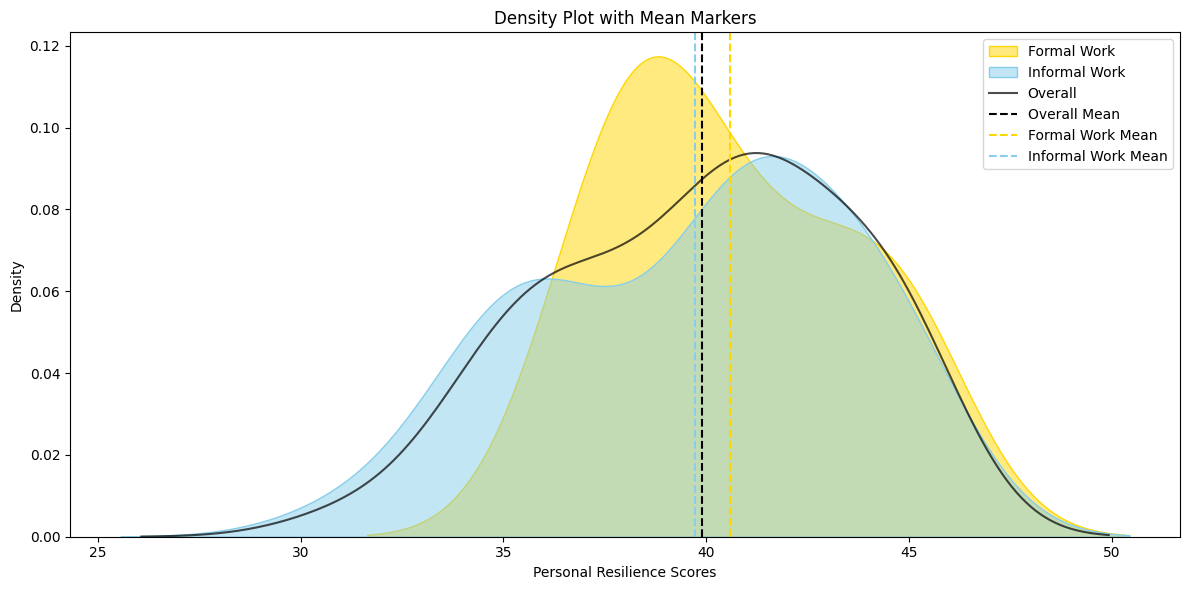

In [10]:
# Generate the KDE plot
plt.figure(figsize=(12, 6))

# KDE plot for formal work households
sns.kdeplot(data=data_filtered[data_filtered['hh_occu'] == 'Formal Work'],
            x='personal_resilience', fill=True, label='Formal Work', color='gold', alpha=0.5)

# KDE plot for informal work households
sns.kdeplot(data=data_filtered[data_filtered['hh_occu'] == 'Informal Work'],
            x='personal_resilience', fill=True, label='Informal Work', color='skyblue', alpha=0.5)

# KDE plot for overall personal resilience
sns.kdeplot(data=data_filtered, x='personal_resilience', color='black', label='Overall', alpha=0.7)

# Adding vertical lines for the means
plt.axvline(overall_mean, color='black', linestyle='--', label='Overall Mean')
plt.axvline(formal_mean, color='gold', linestyle='--', label='Formal Work Mean')
plt.axvline(informal_mean, color='skyblue', linestyle='--', label='Informal Work Mean')

# Adding titles and labels
plt.title('Density Plot with Mean Markers', fontsize=12)
plt.xlabel('Personal Resilience Scores')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


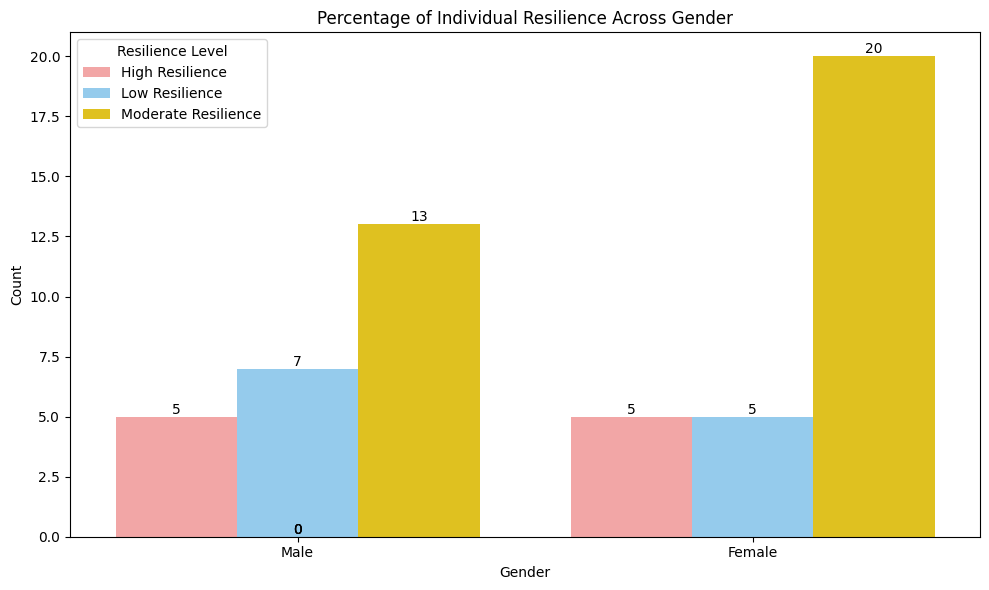

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean and standard deviation of personal resilience scores
mean_resilience = data_filtered['personal_resilience'].mean()
std_resilience = data_filtered['personal_resilience'].std()

# Categorize students into resilience levels
conditions = [
    (data_filtered['personal_resilience'] > mean_resilience + std_resilience),
    (data_filtered['personal_resilience'] <= mean_resilience + std_resilience) &
    (data_filtered['personal_resilience'] >= mean_resilience - std_resilience),
    (data_filtered['personal_resilience'] < mean_resilience - std_resilience)
]
choices = ['High Resilience', 'Moderate Resilience', 'Low Resilience']
data_filtered['resilience_category'] = np.select(conditions, choices)

# Create a custom palette with lighter colors
custom_palette = {
    'High Resilience': '#FF9999',      # Light Red
    'Moderate Resilience': '#FFD700',  # Light Gold
    'Low Resilience': '#87CEFA'        # Light Blue
}

# Create a bar plot where x-axis is gender and resilience levels are split into different colors
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data_filtered, x='stu_gender', hue='resilience_category', palette=custom_palette)

# Adding data labels on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Title and labels
plt.title('Percentage of Individual Resilience Across Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Resilience Level')
plt.tight_layout()

# Show the plot
plt.show()
